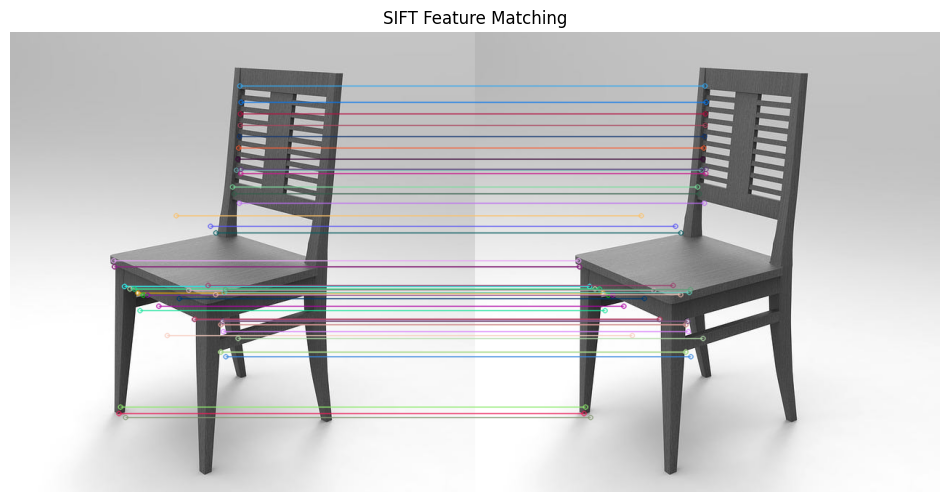

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('chair1.jpg', cv2.IMREAD_GRAYSCALE)  # Query image
image2 = cv2.imread('chair2.jpg', cv2.IMREAD_GRAYSCALE)  # Train image

# Check if images are loaded
if image1 is None or image2 is None:
    print("Error loading images.")
    exit()

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched image
plt.figure(figsize=(12, 8))
plt.imshow(matched_image)
plt.title('SIFT Feature Matching')
plt.axis('off')
plt.show()
